In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



/Users/rezanaghshineh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("general_df.csv")
df = [df.groupby("Country/Region").get_group(country).sort_values("timestamp", ascending=False).iloc[0] for country in df["Country/Region"].unique()]
df = pd.DataFrame(df)
df["death_rate"] = df["death_cases"] / df["conf_cases"]
df["recover_rate"] = df["recov_cases"] / df["conf_cases"]
df_death  = df[df["death_rate"]>0]
df_recov  = df[df["recover_rate"]>0]

# export 2 dfs



Text(0.5, 1.0, 'Death Rate by Country as of 2020-02-23')

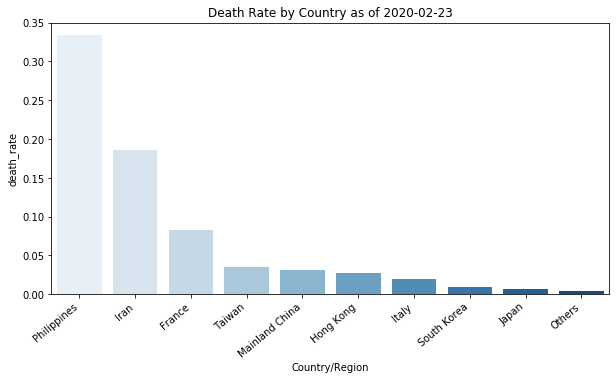

In [3]:
# read df_death
final_date = df_death["timestamp"].iloc[0]
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Country/Region", y="death_rate", data=df_death, order = df_death.sort_values(by="death_rate",ascending=False)["Country/Region"].values,palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10)

plt.title(f"Death Rate by Country as of {final_date}")


Text(0.5, 1.0, 'Recover Rate by Country as of 2020-02-23')

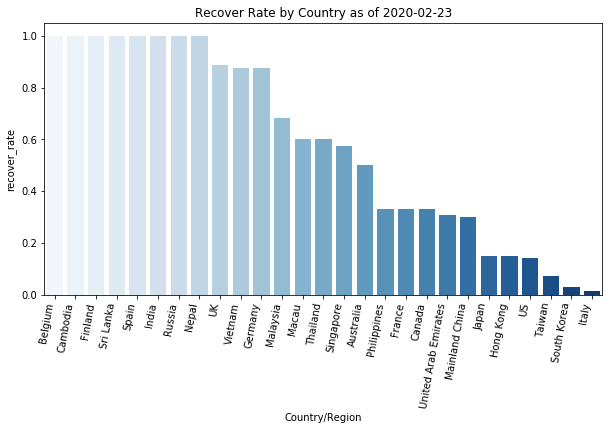

In [4]:
# read df_recov
final_date = df_recov["timestamp"].iloc[0]
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Country/Region", y="recover_rate", data=df_recov, order = df_recov.sort_values(by="recover_rate",ascending=False)["Country/Region"].values,palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right",fontsize=10)

plt.title(f"Recover Rate by Country as of {final_date}")

